<a href="https://colab.research.google.com/github/nikhilv2/EY-Solve4abillion/blob/main/LightGBM_VaccineDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importing the Required Libraries

import lightgbm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
### Reading the Dataset

data = pd.read_csv("/content/MainDataset(Vaccine).csv")
data.head()

,Adhaar ID,Name,District,State,Male,Female,Age 0-18,Age 19-35,Age 36-50,Age 51-60,Age 60 Above,Obese Yes,Obese No,Heart Disease Yes,Heart Disease No,Lung Problem Yes,Lung Problem No,Muscle/ Joint pain,Tiredness,Headache,None,Fever,Mild Allergies,Covid Positive,Covid Negative
0,A67876870,NAVEEN SURESH,Thiruvananthapuram,KERALA,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
1,A67876811,NAMITHA S,KOLLAM,KERALA,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,25004567,GOPINATH KRISHNAN,ALAPPUZHA,KERALA,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,1590423,RITHWIK NAIR,THIRUVALLA,KERALA,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1
4,2348679,MATHEW S,ALAPPUZHA,KERALA,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
### Separating the Dataset to Features and Targets

y = data.iloc[:, [23]]
x = data.iloc[:, [4,5,6,7,8,9,10,11,13,15,17,18,19,20,21,22]]
y.head()

,Covid Positive
0,0
1,0
2,0
3,0
4,0


In [ ]:
### Splitting into Train and Test Sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.85, random_state = 0)

In [ ]:
### Buliding the model

import lightgbm as ltb
model = ltb.LGBMClassifier(learning_rate = 0.01)
model = model.fit(xtrain, ytrain)
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### Predicting the Model

ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
### Using confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[14,  0],
       [ 1,  0]])

In [ ]:
### Predicting acccuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
accuracy

0.9333333333333333

In [ ]:
### Obtaining the Learning Rate with best Accuracy
accuracy =[]
k_value = []
for k in range(100):
  if k%2 != 0:
    model = ltb.LGBMClassifier(learning_rate=k)
    model.fit(xtrain, ytrain) 
    ypred = model.predict(xtest)
    accu = accuracy_score(ytest, ypred)
    accuracy.append(accu)
    k_value.append(k)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


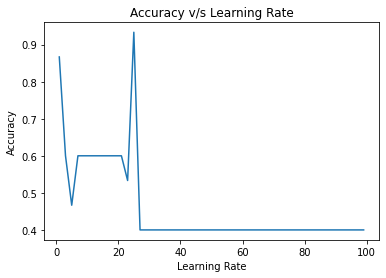

In [ ]:
### Plotting accuracy values

import matplotlib.pyplot as plt
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s Learning Rate')
plt.plot(k_value, accuracy)
plt.show()

In [ ]:
### Count of COVID Patients after Vaccination

covid_positive = y['Covid Positive'].value_counts()
covid_positive

0    87
1    13
Name: Covid Positive, dtype: int64

In [ ]:
### Calculating Efficacy

covid_test = y.groupby('Covid Positive')
covid_negative_group = covid_test.get_group(0)
covid_positive_group = covid_test.get_group(1)
efficacy = len(covid_negative_group)/len(y)*100
print('Efficacy:',efficacy,'%')

Efficacy: 87.0 %


In [ ]:
### Predicting the Test Result by giving inputs

def expected_result():
  gender_m = input("Male:")
  gender_f = input("Female:")
  age_18 = input("0-18:")
  age_35 = input("19-35:")
  age_50 = input("36-50:")
  age_60 = input("51-60:")
  age_old = input("60 Above:")
  obese = input("Obese: ")
  heart = input("Heart Disease: ")
  lung = input("Lung Problems: ")
  muscle_pain = input("Muscle/Joint Pain: ")
  tired = input("Tiredness: ")
  headache = input("Headache: ")
  none = input("None: ")
  fever = input("Fever: ")
  mild_allergies = input("Mild Allergies: ")
  result=model.predict([[gender_m, gender_f, age_18, age_35, age_50, age_60, age_old, obese, heart,
                         lung, muscle_pain, tired, headache, none, fever, mild_allergies]])
  if result==0:
    print("The expected result will be negative.")
  else:
    print("The expected result will be positive.")  

In [ ]:
expected_result()

Male:0
Female:1
0-18:0
19-35:0
36-50:1
51-60:0
60 Above:0
Obese: 0
Heart Disease: 1
Lung Problems: 1
Muscle/Joint Pain: 0
Tiredness: 1
Headache: 0
None: 0
Fever: 0
Mild Allergies: 0
The expected result will be positive.


/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:599: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


In [ ]:
### Data Preprocessing of District

z = data.iloc[:,[2]]
le_z = LabelEncoder()
z = z.apply(LabelEncoder().fit_transform)

dataset = data.iloc[:, [2,23]]
le_dataset = LabelEncoder()
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset.head()


,District,Covid Positive
0,25,0
1,9,0
2,0,0
3,23,0
4,0,0


In [ ]:
### Efficacy in Kollam

area = dataset.groupby('District')

kollam_covid = area.get_group(9)                                        #Corresponding preprocessed value can be entered to obtain Efficacy in each Region

kollam_covid_data = kollam_covid.groupby('Covid Positive')

kollam_covid_negative = kollam_covid_data.get_group(0)

efficacy_region = len(kollam_covid_negative)/len(kollam_covid)*100

print('Efficacy in Kollam:',efficacy_region,'%' )

Efficacy in Kollam: 83.33333333333334 %
